### 유방암 데이터
- 유방암 데이터(이진분류)를 차원축소하여 회귀분석하자.

In [1]:
import pandas as pd

b_df = pd.read_csv('./datasets/breast-cancer-wisconsin-data_data.csv')
b_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [2]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
b_df.drop(labels=['id', 'Unnamed: 32'], axis=1, inplace=True)

In [4]:
b_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
b_df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
result = encoder.fit_transform(b_df['diagnosis'])
b_df['target'] = result

In [7]:
b_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [8]:
pre_b_df = b_df.drop(labels=['diagnosis'], axis=1)
pre_b_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [9]:
pre_b_df.target.value_counts()

target
0    357
1    212
Name: count, dtype: int64

In [10]:
pre_b_df.duplicated().sum()

0

In [11]:
pre_b_df.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>],
       [<Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>],
       [<Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

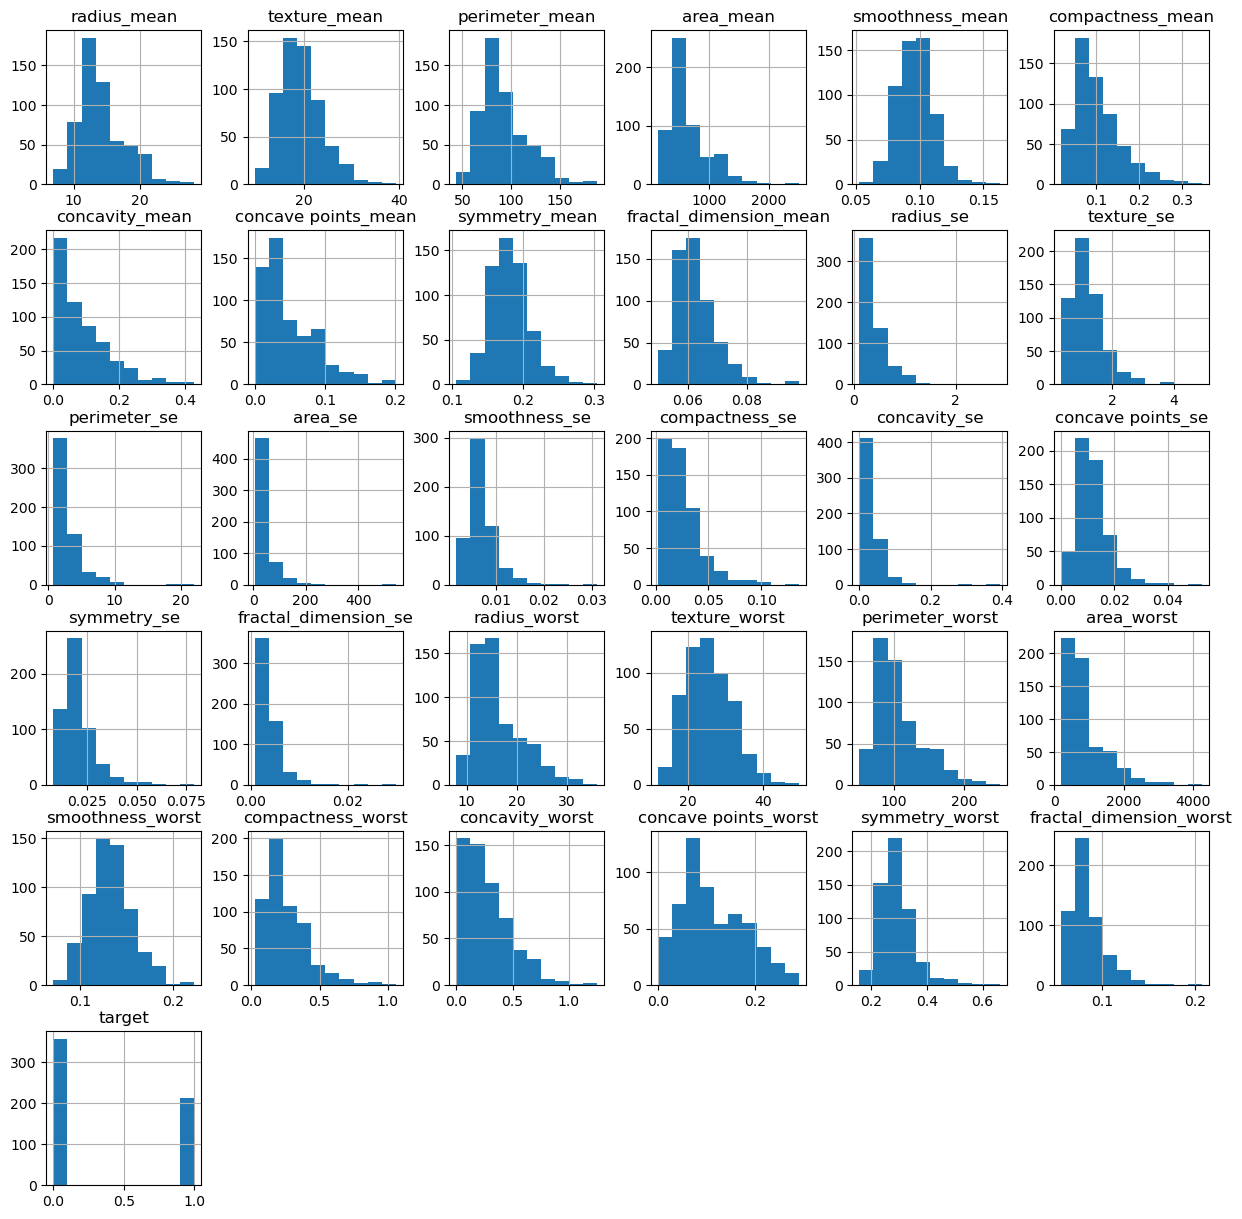

In [12]:
pre_b_df.hist(figsize=(15,15))

#### 분석 진행방향
- 전체 표준화
- OLS, Vif, corr 확인
- 데이터 전처리
- LDA 차원축소 진행
- LDA 차원축소된 데이터로 Pytorch를 통한 로지스틱 모델에 훈련

#### 1. 전체 표준화

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result = scaler.fit_transform(pre_b_df.iloc[:, :-1])
std_pre_b_df = pd.DataFrame(result, columns=pre_b_df.iloc[:,:-1].columns)
std_pre_b_df


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [14]:
std_pre_b_df['target'] = pre_b_df['target']

In [15]:
std_pre_b_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


#### 2. OLS, Vif, Corr 확인

In [16]:
corr = std_pre_b_df.corr()
corr['target'].sort_values(ascending=False)[1:]

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

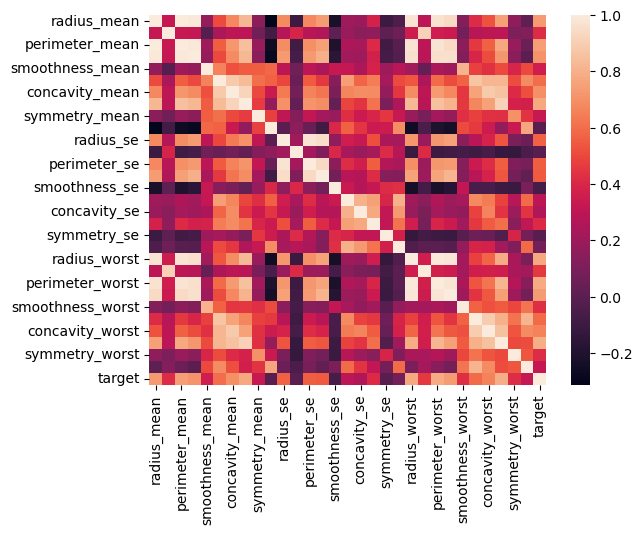

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr)
plt.show()

In [18]:
from statsmodels.api import OLS

features, targets = std_pre_b_df.iloc[:, :-1], std_pre_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.457
Method:                 Least Squares   F-statistic:                              16.98
Date:                Mon, 13 May 2024   Prob (F-statistic):                    1.08e-59
Time:                        09:07:47   Log-Likelihood:                         -337.24
No. Observations:                 569   AIC:                                      734.5
Df Residuals:                     539   BIC:                                      864.8
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [20]:
get_vif(features)

,vif_score,feature
0,3806.115296,radius_mean
1,11.884048,texture_mean
2,3786.400419,perimeter_mean
3,347.878657,area_mean
4,8.194282,smoothness_mean
5,50.505168,compactness_mean
6,70.767720,concavity_mean
7,60.041733,concave points_mean
8,4.220656,symmetry_mean
9,15.756977,fractal_dimension_mean


In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
over_X_train, over_y_train = smote.fit_resample(X_train, y_train)

for i in range(1):
    lda = LinearDiscriminantAnalysis(n_components=(i + 1))
    
    lda_train = lda.fit_transform(over_X_train, over_y_train)

    print(lda.explained_variance_ratio_.sum())

1.0


In [22]:
y_train.isna().sum()

0

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda_train = lda.fit_transform(over_X_train, over_y_train)

lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = over_y_train

In [24]:
lda_train_df

,lda1,target
0,2.365229,0
1,2.614565,0
2,-2.851871,1
3,-2.730603,1
4,-2.990329,1
...,...,...
565,-1.854494,1
566,-0.635352,1
567,-1.916073,1
568,-2.888321,1


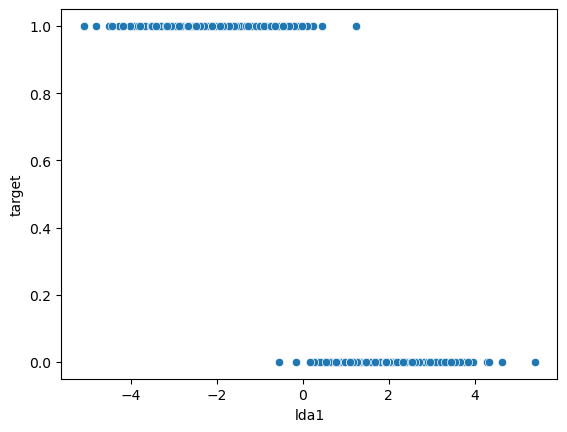

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="lda1", y="target", data=lda_train_df)
plt.show()

In [26]:
import torch
from torch.nn import Sequential, Linear, Sigmoid
from torch.nn.functional import binary_cross_entropy
from sklearn.model_selection import train_test_split
from torch.optim import SGD
import numpy as np

torch.manual_seed(124)

features, targets = lda_train_df.iloc[:, :-1], lda_train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

logistic_r = Sequential(
    Linear(1, 1), # 13개 input을 통해 결과 출력
    Sigmoid(),
)

optimizer = SGD(logistic_r.parameters(), lr=0.000095)

epochs = 100000

for epoch in range(1, epochs + 1):
    H = logistic_r(X_train)
    loss = binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())}\nLoss: {np.round(loss.item(), 4)}')
        print('=' * 90)

Epoch: 10000/100000
W1: -0.9503, b: 0.0
Loss: 0.189
Epoch: 20000/100000
W1: -1.1273, b: 0.0
Loss: 0.1555
Epoch: 30000/100000
W1: -1.2639, b: 0.0
Loss: 0.1356
Epoch: 40000/100000
W1: -1.3759, b: 0.0
Loss: 0.1224
Epoch: 50000/100000
W1: -1.4712, b: 0.0
Loss: 0.1128
Epoch: 60000/100000
W1: -1.5544, b: 0.0
Loss: 0.1055
Epoch: 70000/100000
W1: -1.6285, b: 0.0
Loss: 0.0997
Epoch: 80000/100000
W1: -1.6954, b: 0.0
Loss: 0.095
Epoch: 90000/100000
W1: -1.7564, b: 0.0
Loss: 0.091
Epoch: 100000/100000
W1: -1.8127, b: 0.0
Loss: 0.0877


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [28]:
get_evaluation(y_test.detach(), logistic_r(X_test) >= 0.5)

오차 행렬
[[56  1]
 [ 0 57]]
정확도: 0.9912, 정밀도: 0.9828, 재현율: 1.0000, F1: 0.9913, ROC-AUC: 0.9912
################################################################################


Sklearn으로 훈련 진행

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = lda_train_df.iloc[:, :-1], lda_train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 일반적으로 데이터 세트가 작을 경우 liblinear의 성능이 좋고, 큰 경우 'sag', 'saga'가 더 좋다.
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
logistic_r = LogisticRegression(solver='liblinear', penalty = 'l2', C=1, random_state=124)
logistic_r.fit(X_train, y_train)
prediction = logistic_r.predict(X_test)

오차 행렬
[[56  1]
 [ 0 57]]
정확도: 0.9912, 정밀도: 0.9828, 재현율: 1.0000, F1: 0.9913, ROC-AUC: 0.9912
################################################################################


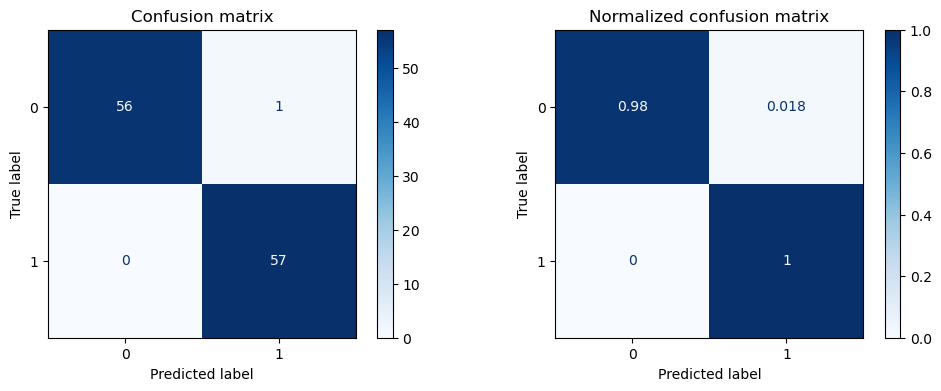

In [30]:
get_evaluation(y_test, prediction, logistic_r, X_test)

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
# precision_recall_curve_plot(y_test, logistic_r.predict_proba(X_test)[:, 1] )

#### Cycle 1 결과
- 차원축소를 진행했음에도 불구하고 점수가 높게 나타난 것을 알 수 있었다.
- 하지만 p-value 및 다중 공산성의 문제가 발생했고 이에 따라 해당 feature들을 건드려야할지 자문을 구했다.
- 강사님께서는 차원축소를 진행했음에도 저렇게 점수가 높게 나온 것은 feature들을 따로 건드리지 말고,  
  과적합 판단하고 마무리를 짓는 것이 좋겠다라고 말씀해주셨다.
- 따라서, 과적합 판단을 위해, train data를 val data와 train data로 나누어 확인한다.

### Cycle 2

In [37]:
import torch
from torch.nn import Sequential, Linear, Sigmoid
from torch.nn.functional import binary_cross_entropy
from sklearn.model_selection import train_test_split
from torch.optim import SGD
import numpy as np

torch.manual_seed(124)

features, targets = lda_train_df.iloc[:, :-1], lda_train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train_train, X_val_train, y_train_train, y_val_train = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

X_train_train = torch.FloatTensor(X_train_train.values)
X_val_train = torch.FloatTensor(X_val_train.values)

y_train_train = torch.FloatTensor(y_train_train.values).view(-1,1)
y_val_train = torch.FloatTensor(y_val_train.values).view(-1,1)


In [33]:
logistic_r = Sequential(
    Linear(1, 1), 
    Sigmoid(),
)

optimizer_train = SGD(logistic_r.parameters(), lr=0.000095)
train_losses = []

epochs = 100000

for epoch in range(1, epochs + 1):
    H_train = logistic_r(X_train_train)
    loss_train = binary_cross_entropy(H_train, y_train_train)
    train_losses.append(loss_train.item())

    optimizer_train.zero_grad()
    loss_train.backward()
    optimizer_train.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())}\nLoss: {np.round(loss_train.item(), 4)}')
        print('=' * 90)

Epoch: 10000/100000
W1: -0.9505, b: 0.0
Loss: 0.189
Epoch: 20000/100000
W1: -1.1293, b: 0.0
Loss: 0.1549
Epoch: 30000/100000
W1: -1.2682, b: 0.0
Loss: 0.1344
Epoch: 40000/100000
W1: -1.3826, b: 0.0
Loss: 0.1206
Epoch: 50000/100000
W1: -1.4803, b: 0.0
Loss: 0.1105
Epoch: 60000/100000
W1: -1.5658, b: 0.0
Loss: 0.1028
Epoch: 70000/100000
W1: -1.6422, b: 0.0
Loss: 0.0966
Epoch: 80000/100000
W1: -1.7113, b: 0.0
Loss: 0.0916
Epoch: 90000/100000
W1: -1.7745, b: 0.0
Loss: 0.0874
Epoch: 100000/100000
W1: -1.8328, b: 0.0
Loss: 0.0838


In [34]:
logistic_r = Sequential(
    Linear(1, 1), 
    Sigmoid(),
)

optimizer_val = SGD(logistic_r.parameters(), lr=0.000095)
val_losses = []

epochs = 100000

for epoch in range(1, epochs + 1):
    H_val = logistic_r(X_val_train)
    loss_val = binary_cross_entropy(H_val, y_val_train)
    val_losses.append(loss_val.item())

    optimizer_val.zero_grad()
    loss_val.backward()
    optimizer_val.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())}\nLoss: {np.round(loss_val.item(), 4)}')
        print('=' * 90)

Epoch: 10000/100000
W1: -0.341, b: -0.0
Loss: 0.4202
Epoch: 20000/100000
W1: -0.7376, b: -0.0
Loss: 0.2478
Epoch: 30000/100000
W1: -0.9693, b: -0.0
Loss: 0.1905
Epoch: 40000/100000
W1: -1.1346, b: -0.0
Loss: 0.1615
Epoch: 50000/100000
W1: -1.2643, b: -0.0
Loss: 0.1437
Epoch: 60000/100000
W1: -1.3715, b: -0.0
Loss: 0.1315
Epoch: 70000/100000
W1: -1.4635, b: -0.0
Loss: 0.1225
Epoch: 80000/100000
W1: -1.5442, b: -0.0
Loss: 0.1156
Epoch: 90000/100000
W1: -1.6163, b: -0.0
Loss: 0.11
Epoch: 100000/100000
W1: -1.6817, b: -0.0
Loss: 0.1054


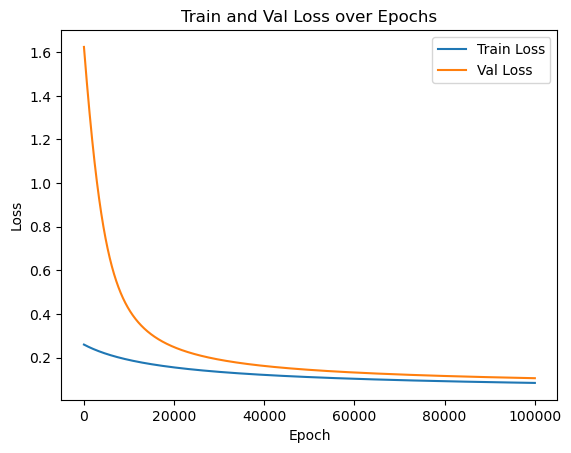

In [35]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Val Loss over Epochs')
plt.legend()
plt.show()

그래프를 확인한 결과 Epoch를 50000 이상으로 훈련했을 때 알맞게 fit되어 훈련된다는 것을 알 수 있다.

In [41]:
get_evaluation(y_test.detach().numpy(), logistic_r(X_test) >= 0.5)

오차 행렬
[[58  0]
 [ 2 54]]
정확도: 0.9825, 정밀도: 1.0000, 재현율: 0.9643, F1: 0.9818, ROC-AUC: 0.9821
################################################################################


### Cycle 3
- 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = lda_train_df.iloc[:, :-1], lda_train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 일반적으로 데이터 세트가 작을 경우 liblinear의 성능이 좋고, 큰 경우 'sag', 'saga'가 더 좋다.
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
logistic_r = LogisticRegression(solver='liblinear', penalty = 'l2', C=0.01, random_state=124)
logistic_r.fit(X_train, y_train)
prediction = logistic_r.predict(X_test)

오차 행렬
[[56  1]
 [ 0 57]]
정확도: 0.9912, 정밀도: 0.9828, 재현율: 1.0000, F1: 0.9913, ROC-AUC: 0.9912
################################################################################


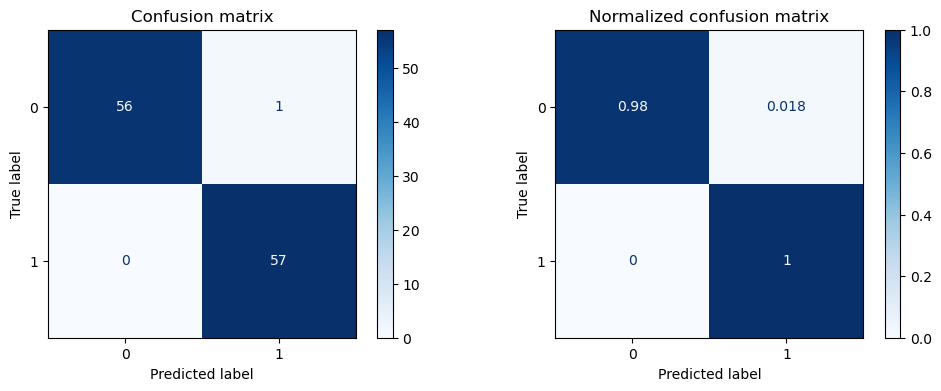

In [64]:
get_evaluation(y_test, prediction, logistic_r, X_test)

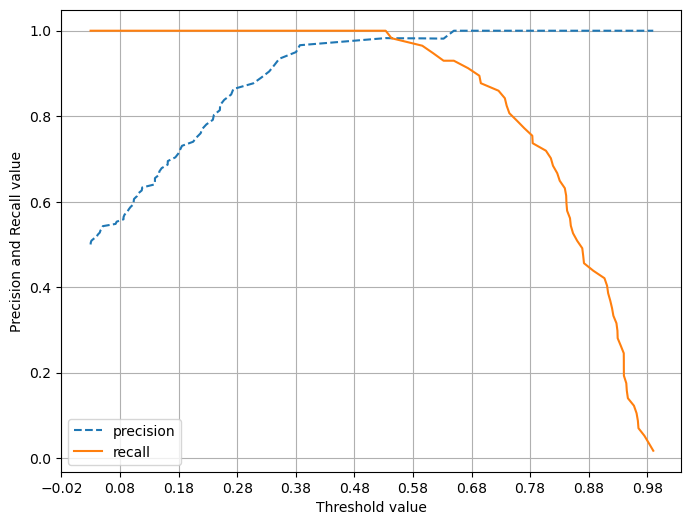

In [66]:
precision_recall_curve_plot(y_test, logistic_r.predict_proba(X_test)[:, 1] )

threshold를 추가적으로 만지지 않고, 이대로 훈련을 종료